In [1]:
import os
import re
import pandas as pd
from scipy import stats
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify the path to the main directory

main_directory = "/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out"

# Get all folders in the main directory

all_governorates = []
# Loop through all the folders in the main directory and save folder paths in a list
for folder_name in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder_name)
    all_governorates.append(folder_path)

In [3]:
all_governorates = all_governorates[0:4] + all_governorates[5:]
all_governorates

['/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز ابوالمطامير',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز المنيا',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز الأقصر',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز جرجا',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز دشنا',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز ببا',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز العدوة',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز ملوى',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز أسوان',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز الجيزة',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز أبوتيج',
 '/Users/nourabdelbaki/Desktop/Personal/Work/Spatial/Data/out/output_مركز بنى سويف',
 '/User

In [159]:
# For each folder, there is a folder for each POI, 
# and each POI folder contains a CSV file with the data

output_pattern = re.compile(r'output_([^/]+)')
poi_pattern = re.compile(r'poi_([^/]+)')

# Initialize an empty dictionary to store the results
results = {}

# Loop through all the folders in the main directory
for folder in all_governorates:
    for subfolder in os.listdir(folder):
        folder_path = os.path.join(folder, subfolder)

        output_match = output_pattern.search(folder_path)
        poi_match = poi_pattern.search(folder_path)
        
        if output_match and poi_match:
            output_text = output_match.group(1)
            poi_text = poi_match.group(1)
            
            # Find the CSV file in the folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".csv"):
                    csv_path = os.path.join(folder_path, file_name)
                    
                    # Read the CSV file
                    df = pd.read_csv(csv_path)
                    
                    # Count the number of rows in the CSV file
                    row_count = len(df)

                    # Append the extracted information into the dictionary
                    results[(output_text, poi_text)] = row_count
# print the results
                    
results

{('مركز ابوالمطامير', 'مركز شباب'): 86,
 ('مركز ابوالمطامير', 'مستشفى'): 143,
 ('مركز ابوالمطامير', 'منفذ بيع'): 15,
 ('مركز ابوالمطامير', 'تموين'): 26,
 ('مركز ابوالمطامير', 'مدرسة'): 858,
 ('مركز المنيا', 'مستشفى'): 125,
 ('مركز المنيا', 'تموين'): 29,
 ('مركز المنيا', 'منفذ بيع'): 9,
 ('مركز المنيا', 'مركز شباب'): 38,
 ('مركز المنيا', 'مدرسة'): 498,
 ('مركز الأقصر', 'تموين'): 19,
 ('مركز الأقصر', 'مستشفى'): 146,
 ('مركز الأقصر', 'مدرسة'): 427,
 ('مركز الأقصر', 'مركز شباب'): 56,
 ('مركز الأقصر', 'منفذ بيع'): 9,
 ('مركز جرجا', 'مستشفى'): 113,
 ('مركز جرجا', 'منفذ بيع'): 6,
 ('مركز جرجا', 'مركز شباب'): 26,
 ('مركز جرجا', 'تموين'): 26,
 ('مركز جرجا', 'مدرسة'): 371,
 ('مركز دشنا', 'منفذ بيع'): 3,
 ('مركز دشنا', 'مدرسة'): 218,
 ('مركز دشنا', 'مركز شباب'): 26,
 ('مركز دشنا', 'تموين'): 13,
 ('مركز دشنا', 'مستشفى'): 48,
 ('مركز ببا', 'تموين'): 18,
 ('مركز ببا', 'مستشفى'): 72,
 ('مركز ببا', 'منفذ بيع'): 4,
 ('مركز ببا', 'مدرسة'): 376,
 ('مركز ببا', 'مركز شباب'): 53,
 ('مركز العدوة', 'مركز شباب

In [160]:
pois = set(key[1] for key in results.keys())

for poi in pois:
    if poi == 'مستشفى':
        hospital = \
            {key[0]: value for key, value in results.items() if key[1] == poi}
    elif poi == 'مدرسة':
        school = \
            {key[0]: value for key, value in results.items() if key[1] == poi}    
    elif poi == 'تموين':
        subsidized_goods = \
            {key[0]: value for key, value in results.items() if key[1] == poi}
    elif poi == 'مركز شباب':
        youth_center = \
            {key[0]: value for key, value in results.items() if key[1] == poi}  
    elif poi == 'منفذ بيع':
        retail_outlet = \
            {key[0]: value for key, value in results.items() if key[1] == poi}


In [167]:
# Create a list of the names of the identified poorest marakez that are in 
# the pilot

poor_marakez = ['مركز ديروط', 'قسم  برج العرب', 'مركز الفشن',
'مركز ملوى', 'مركز سوهاج', 'مركز أدفو', 'مركز ابوالمطامير',
'مركز أطفيح', 'مركز بلقاس', 'مركز أبو طشت', 'مركز البلينا', 'مركز العدوة',
'مركز أبوتيج', 'مركز ببا', 'مركز جرجا', 'قسم غرب النوبارية', 'مركز إمبابة',
'مركز الحسينية', 'مركز دشنا']

In [168]:
# To double check that these spellings and spacings are correct

for markez in poor_marakez:
    if not any(markez in key for key in results.keys()):
        print(markez)

## Prep for mean testing:

In [169]:
# hospitals
df_hospital = pd.DataFrame(hospital.items(), columns=['Markaz', 'Count'])
df_hospital['poor'] = df_hospital['Markaz'].isin(poor_marakez)

# schools
df_school = pd.DataFrame(school.items(), columns=['Markaz', 'Count'])
df_school['poor'] = df_school['Markaz'].isin(poor_marakez)

# subsidized_goods
df_subsidized = pd.DataFrame(subsidized_goods.items(), columns=['Markaz', 'Count'])
df_subsidized['poor'] = df_subsidized['Markaz'].isin(poor_marakez)

# youth_center
df_youth_center = pd.DataFrame(youth_center.items(), columns=['Markaz', 'Count'])
df_youth_center['poor'] = df_youth_center['Markaz'].isin(poor_marakez)

# retail_outlet
df_retail_outlet = pd.DataFrame(retail_outlet.items(), columns=['Markaz', 'Count'])
df_retail_outlet['poor'] = df_retail_outlet['Markaz'].isin(poor_marakez)

In [271]:
df_youth_center['Count'].sum()

1644

## Mean testing for hospitals:

In [170]:
df_hospital[df_hospital['poor']]['Count'].count()

19

In [171]:
df_hospital[~df_hospital['poor']]['Count'].count()

10

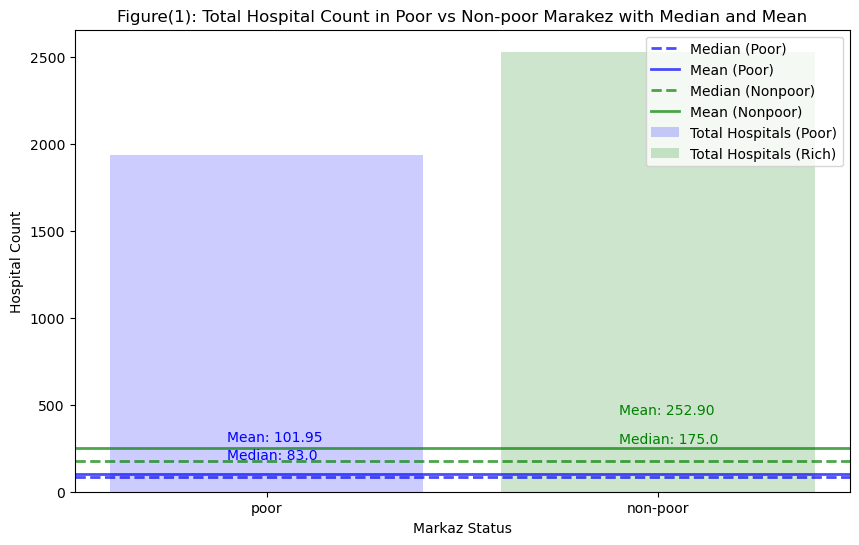

In [172]:
# Aggregate the data to get the total, median, and average count of hospitals in poor and rich marakez
hospital_grouped = df_hospital.groupby('poor')['Count'].agg(['sum', 'median', 'mean']).reset_index()

# Calculate the median and mean for each markaz type
median_poor = df_hospital[df_hospital['poor']]['Count'].median()
median_rich = df_hospital[~df_hospital['poor']]['Count'].median()
mean_poor = df_hospital[df_hospital['poor']]['Count'].mean()
mean_rich = df_hospital[~df_hospital['poor']]['Count'].mean()

# Visualize the data using a bar plot and add the median and average lines
plt.figure(figsize=(10, 6))
#plt.bar(hospital_grouped['poor'], hospital_grouped['sum'], color=['blue', 'green'], alpha=0.2)

bar_poor = plt.bar('poor', hospital_grouped.loc[hospital_grouped['poor'] == True, 'sum'], color='blue', alpha=0.2, label='Total Hospitals (Poor)')
bar_rich = plt.bar('non-poor', hospital_grouped.loc[hospital_grouped['poor'] == False, 'sum'], color='green', alpha=0.2, label='Total Hospitals (Rich)')

# Add horizontal lines for median and mean with reduced opacity
plt.axhline(y=median_poor, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Median (Poor)')
plt.axhline(y=mean_poor, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='Mean (Poor)')
plt.axhline(y=median_rich, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Median (Nonpoor)')
plt.axhline(y=mean_rich, color='green', linestyle='-', linewidth=2, alpha=0.7, label='Mean (Nonpoor)')

# Add text annotations for median and mean
plt.text(x=-0.1, y=median_poor + 100, s=f'Median: {median_poor}', color='blue')
plt.text(x=-0.1, y=mean_poor + 190, s=f'Mean: {mean_poor:.2f}', color='blue')
plt.text(x=0.9, y=median_rich + 100, s=f'Median: {median_rich}', color='green')
plt.text(x=0.9, y=mean_rich + 190, s=f'Mean: {mean_rich:.2f}', color='green')

# Set plot labels and title
plt.xlabel('Markaz Status')
plt.ylabel('Hospital Count')
plt.title('Figure(1): Total Hospital Count in Poor vs Non-poor Marakez with Median and Mean')
plt.legend()
plt.show()


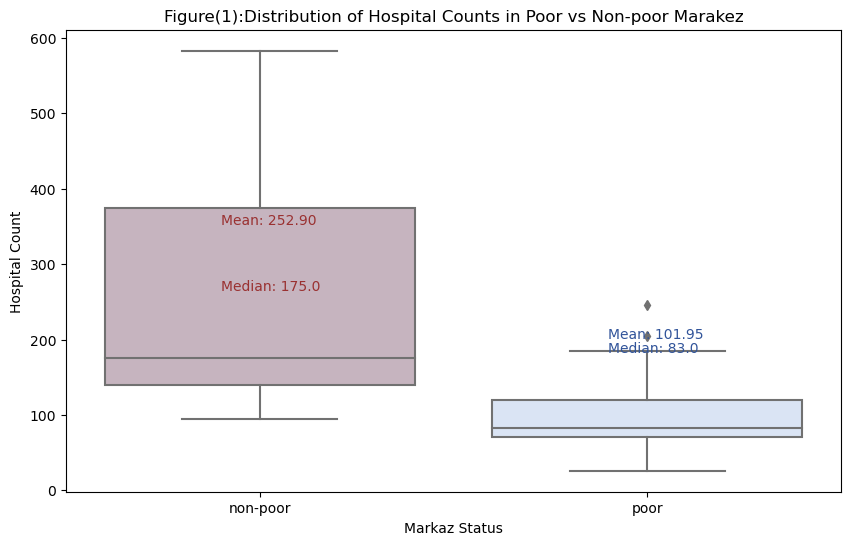

In [173]:
plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 
# Calculate the median and mean for each markaz type
median_poor = df_hospital[df_hospital['poor']]['Count'].median()
median_rich = df_hospital[~df_hospital['poor']]['Count'].median()
mean_poor = df_hospital[df_hospital['poor']]['Count'].mean()
mean_rich = df_hospital[~df_hospital['poor']]['Count'].mean()

# Add text annotations for median and mean
plt.text(x=0.9, y=median_poor + 100, s=f'Median: {median_poor}', color='#31549A')
plt.text(x=0.9, y=mean_poor + 100, s=f'Mean: {mean_poor:.2f}', color='#31549A')
plt.text(x=-0.1, y=median_rich + 90, s=f'Median: {median_rich}', color="#9A3131")
plt.text(x=-0.1, y=mean_rich + 100, s=f'Mean: {mean_rich:.2f}', color="#9A3131")

sns.boxplot(x='poor', y='Count', data=df_hospital, palette=custom_palette)

plt.xlabel('Markaz Status')
plt.xticks(ticks=[0, 1], labels=['non-poor', 'poor'])
plt.ylabel('Hospital Count')
plt.title('Figure(1):Distribution of Hospital Counts in Poor vs Non-poor Marakez')
plt.show()

In [174]:
# T-test for hospitals in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_hospital[df_hospital['poor']]['Count']
rich_counts = df_hospital[~df_hospital['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

# Wilcoxon; no assumption of normality + assuming related samples
# print(stats.wilcoxon(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))
# print(stats.wilcoxon(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count'], alternative='less'))


TtestResult(statistic=-3.5492812593526297, pvalue=0.0014387517789066044, df=27.0)
MannwhitneyuResult(statistic=25.0, pvalue=0.0014263185353969752)
MannwhitneyuResult(statistic=25.0, pvalue=0.0007131592676984876)


In [175]:
df_hospital[df_hospital['poor']]['Count'].describe()

count     19.000000
mean     101.947368
std       56.796394
min       26.000000
25%       71.000000
50%       83.000000
75%      119.500000
max      246.000000
Name: Count, dtype: float64

In [176]:
df_hospital[~df_hospital['poor']]['Count'].describe()

count     10.000000
mean     252.900000
std      170.591422
min       94.000000
25%      139.250000
50%      175.000000
75%      374.000000
max      583.000000
Name: Count, dtype: float64

In [177]:
df_hospital[df_hospital['poor']]['Count']

0     143
3     113
4      48
5      72
6      74
7      78
10     48
13    126
14    205
15    185
16     81
17     97
19    246
20     70
23     83
25     88
26     89
27     65
28     26
Name: Count, dtype: int64

In [178]:
df_hospital[~df_hospital['poor']]['Count']

1     125
2     146
8      94
9     583
11    147
12    137
18    428
21    212
22    203
24    454
Name: Count, dtype: int64

## Mean testing for schools:

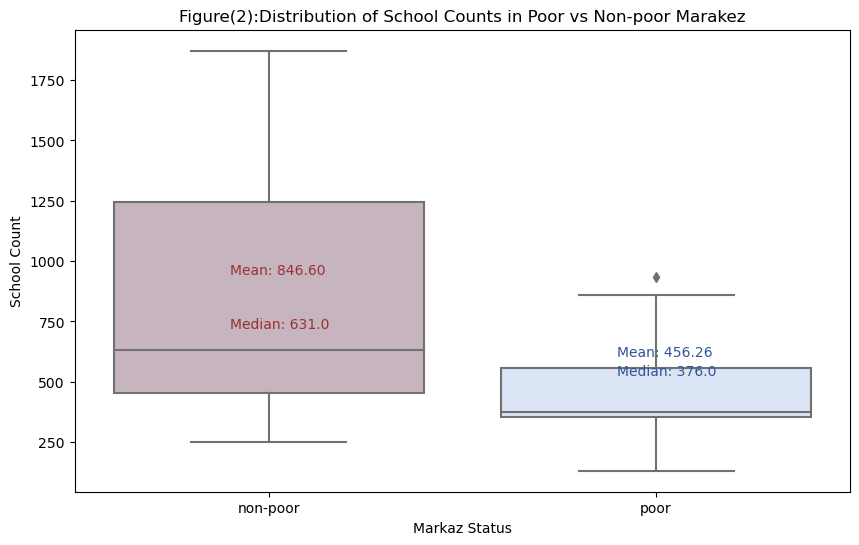

In [179]:
# Calculate the median and mean for each markaz type
median_poor = df_school[df_school['poor']]['Count'].median()
median_rich = df_school[~df_school['poor']]['Count'].median()
mean_poor = df_school[df_school['poor']]['Count'].mean()
mean_rich = df_school[~df_school['poor']]['Count'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

# Add text annotations for median and mean
plt.text(x=0.9, y=median_poor + 150, s=f'Median: {median_poor}', color='#31549A')
plt.text(x=0.9, y=mean_poor + 150, s=f'Mean: {mean_poor:.2f}', color='#31549A')
plt.text(x=-0.1, y=median_rich + 90, s=f'Median: {median_rich}', color="#9A3131")
plt.text(x=-0.1, y=mean_rich + 100, s=f'Mean: {mean_rich:.2f}', color="#9A3131")

sns.boxplot(x='poor', y='Count', data=df_school, palette=custom_palette)

plt.xlabel('Markaz Status')
plt.xticks(ticks=[0, 1], labels=['non-poor', 'poor'])
plt.ylabel('School Count')
plt.title('Figure(2):Distribution of School Counts in Poor vs Non-poor Marakez')
plt.show()


In [180]:
# T-test for schools in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_school[df_school['poor']]['Count']
rich_counts = df_school[~df_school['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable


TtestResult(statistic=-2.7844679442902427, pvalue=0.009676996513457709, df=27.0)
MannwhitneyuResult(statistic=44.0, pvalue=0.020482805624479294)
MannwhitneyuResult(statistic=44.0, pvalue=0.010241402812239647)


In [181]:
df_school[df_school['poor']]['Count'].describe()

count     19.000000
mean     456.263158
std      206.915668
min      131.000000
25%      355.500000
50%      376.000000
75%      556.500000
max      933.000000
Name: Count, dtype: float64

In [182]:
df_school[~df_school['poor']]['Count'].describe()

count      10.000000
mean      846.600000
std       548.292339
min       250.000000
25%       451.500000
50%       631.000000
75%      1244.250000
max      1872.000000
Name: Count, dtype: float64

## Mean Testing for Tamween:

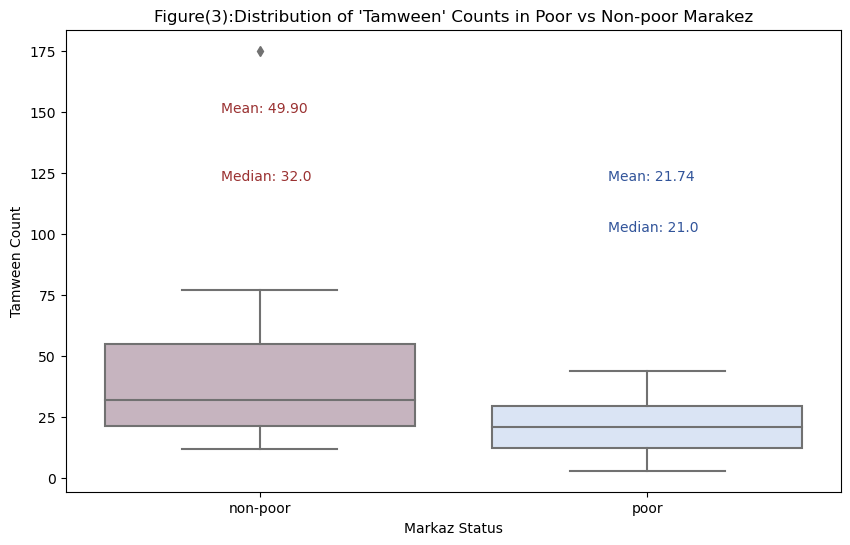

In [183]:
# Calculate the median and mean for each markaz type
median_poor = df_subsidized[df_subsidized['poor']]['Count'].median()
median_rich = df_subsidized[~df_subsidized['poor']]['Count'].median()
mean_poor = df_subsidized[df_subsidized['poor']]['Count'].mean()
mean_rich = df_subsidized[~df_subsidized['poor']]['Count'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

# Add text annotations for median and mean
plt.text(x=0.9, y=median_poor + 80, s=f'Median: {median_poor}', color='#31549A')
plt.text(x=0.9, y=mean_poor + 100, s=f'Mean: {mean_poor:.2f}', color='#31549A')
plt.text(x=-0.1, y=median_rich + 90, s=f'Median: {median_rich}', color="#9A3131")
plt.text(x=-0.1, y=mean_rich + 100, s=f'Mean: {mean_rich:.2f}', color="#9A3131")

sns.boxplot(x='poor', y='Count', data=df_subsidized, palette=custom_palette)

plt.xlabel('Markaz Status')
plt.xticks(ticks=[0, 1], labels=['non-poor', 'poor'])
plt.ylabel('Tamween Count')
plt.title('Figure(3):Distribution of \'Tamween\' Counts in Poor vs Non-poor Marakez')
plt.show()

In [184]:
# T-test for tamween in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_subsidized[df_subsidized['poor']]['Count']
rich_counts = df_subsidized[~df_subsidized['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.4274819426010845, pvalue=0.02214960658819885, df=27.0)
MannwhitneyuResult(statistic=50.5, pvalue=0.043269431315585735)
MannwhitneyuResult(statistic=50.5, pvalue=0.021634715657792868)


In [202]:
df_school

,Markaz,Count,poor
0,مركز ابوالمطامير,858,True
1,مركز المنيا,498,False
2,مركز الأقصر,427,False
3,مركز جرجا,371,True
4,مركز دشنا,218,True
5,مركز ببا,376,True
6,مركز العدوة,357,True
7,مركز ملوى,431,True
8,مركز أسوان,250,False
9,مركز الجيزة,1872,False


In [185]:
df_subsidized[df_subsidized['poor']]['Count'].describe()

count    19.000000
mean     21.736842
std      12.036251
min       3.000000
25%      12.500000
50%      21.000000
75%      29.500000
max      44.000000
Name: Count, dtype: float64

In [186]:
df_subsidized[~df_subsidized['poor']]['Count'].describe()

count     10.000000
mean      49.900000
std       48.537385
min       12.000000
25%       21.500000
50%       32.000000
75%       54.750000
max      175.000000
Name: Count, dtype: float64

## Mean Testing for Youth Centers:

In [188]:
df_youth_center[~df_youth_center['poor']]['Count'].describe()

count     10.000000
mean      77.300000
std       39.810803
min       33.000000
25%       56.750000
50%       63.500000
75%       92.250000
max      157.000000
Name: Count, dtype: float64

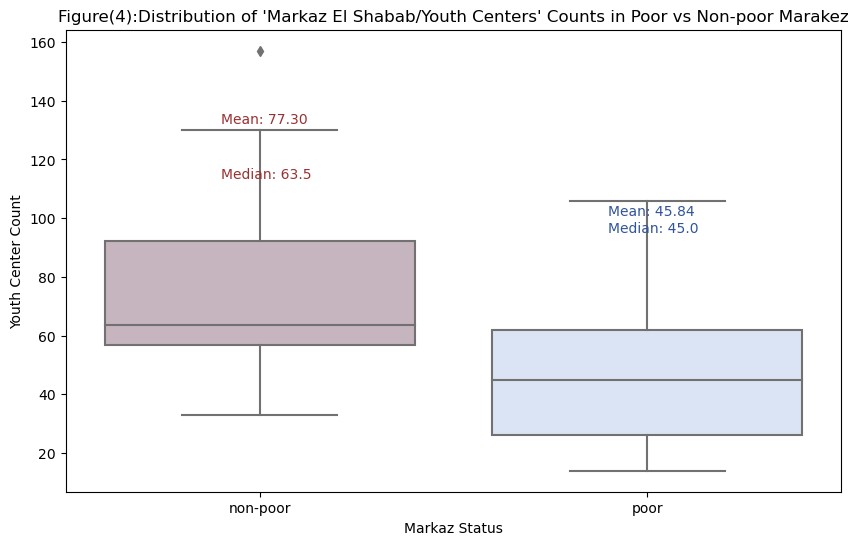

In [189]:
# Calculate the median and mean for each markaz type
median_poor = df_youth_center[df_youth_center['poor']]['Count'].median()
median_rich = df_youth_center[~df_youth_center['poor']]['Count'].median()
mean_poor = df_youth_center[df_youth_center['poor']]['Count'].mean()
mean_rich = df_youth_center[~df_youth_center['poor']]['Count'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

# Add text annotations for median and mean
plt.text(x=0.9, y=median_poor + 50, s=f'Median: {median_poor}', color='#31549A')
plt.text(x=0.9, y=mean_poor + 55, s=f'Mean: {mean_poor:.2f}', color='#31549A')
plt.text(x=-0.1, y=median_rich + 50, s=f'Median: {median_rich}', color="#9A3131")
plt.text(x=-0.1, y=mean_rich + 55, s=f'Mean: {mean_rich:.2f}', color="#9A3131")

sns.boxplot(x='poor', y='Count', data=df_youth_center, palette=custom_palette)

plt.xlabel('Markaz Status')
plt.xticks(ticks=[0, 1], labels=['non-poor', 'poor'])
plt.ylabel('Youth Center Count')
plt.title('Figure(4):Distribution of \'Markaz El Shabab/Youth Centers\' Counts in Poor vs Non-poor Marakez')
plt.show()

In [190]:
# T-test for youth centers in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_youth_center[df_youth_center['poor']]['Count']
rich_counts = df_youth_center[~df_youth_center['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.563404386171209, pvalue=0.016251874228934392, df=27.0)
MannwhitneyuResult(statistic=44.0, pvalue=0.02042069643234162)
MannwhitneyuResult(statistic=44.0, pvalue=0.01021034821617081)


## Mean Testing for Retail Outlets:

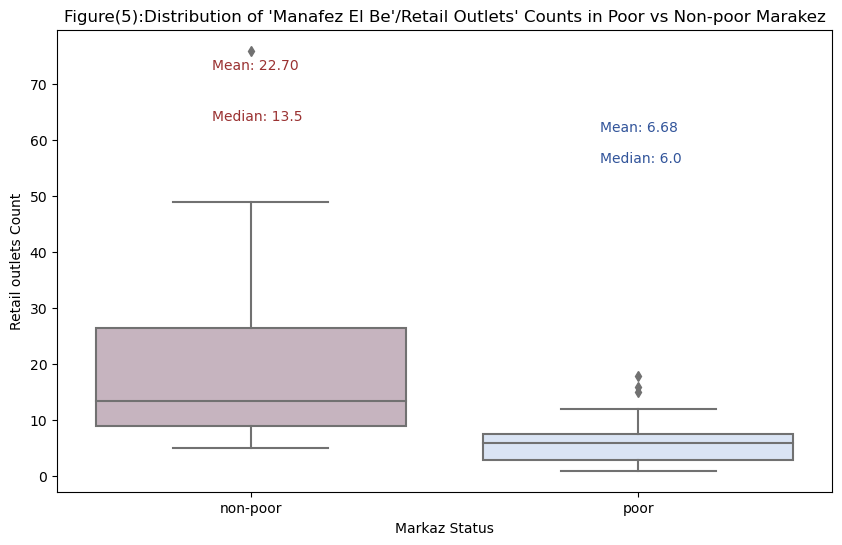

In [192]:
# Calculate the median and mean for each markaz type
median_poor = df_retail_outlet[df_retail_outlet['poor']]['Count'].median()
median_rich = df_retail_outlet[~df_retail_outlet['poor']]['Count'].median()
mean_poor = df_retail_outlet[df_retail_outlet['poor']]['Count'].mean()
mean_rich = df_retail_outlet[~df_retail_outlet['poor']]['Count'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

# Add text annotations for median and mean
plt.text(x=0.9, y=median_poor + 50, s=f'Median: {median_poor}', color='#31549A')
plt.text(x=0.9, y=mean_poor + 55, s=f'Mean: {mean_poor:.2f}', color='#31549A')
plt.text(x=-0.1, y=median_rich + 50, s=f'Median: {median_rich}', color="#9A3131")
plt.text(x=-0.1, y=mean_rich + 50, s=f'Mean: {mean_rich:.2f}', color="#9A3131")

sns.boxplot(x='poor', y='Count', data=df_retail_outlet, palette=custom_palette)

plt.xlabel('Markaz Status')
plt.xticks(ticks=[0, 1], labels=['non-poor', 'poor'])
plt.ylabel('Retail outlets Count')
plt.title('Figure(5):Distribution of \'Manafez El Be\'/Retail Outlets\' Counts in Poor vs Non-poor Marakez')
plt.show()

In [193]:
# T-test for retail outlets in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_retail_outlet[df_retail_outlet['poor']]['Count']
rich_counts = df_retail_outlet[~df_retail_outlet['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.943179695550182, pvalue=0.006601357907237297, df=27.0)
MannwhitneyuResult(statistic=34.0, pvalue=0.005372171238464117)
MannwhitneyuResult(statistic=34.0, pvalue=0.0026860856192320584)


In [194]:
df_retail_outlet[df_retail_outlet['poor']]['Count'].describe()

count    19.000000
mean      6.684211
std       5.044828
min       1.000000
25%       3.000000
50%       6.000000
75%       7.500000
max      18.000000
Name: Count, dtype: float64

In [195]:
df_retail_outlet[~df_retail_outlet['poor']]['Count'].describe()

count    10.000000
mean     22.700000
std      23.046089
min       5.000000
25%       9.000000
50%      13.500000
75%      26.500000
max      76.000000
Name: Count, dtype: float64

## Mean testing for overall not within each POI:

In [196]:
selected_data = [(key[0], key[1], value) for key, value in results.items()]

# Create DataFrame from the selected data
df_all = pd.DataFrame(selected_data, columns=['Markaz', 'poi', 'Count'])
df_all['poor'] = df_all['Markaz'].isin(poor_marakez)


In [197]:
df_all.head()

,Markaz,poi,Count,poor
0,مركز ابوالمطامير,مركز شباب,86,True
1,مركز ابوالمطامير,مستشفى,143,True
2,مركز ابوالمطامير,منفذ بيع,15,True
3,مركز ابوالمطامير,تموين,26,True
4,مركز ابوالمطامير,مدرسة,858,True


In [198]:
# T-test for all POIs in the poorest marakez vs. hospitals in the rest of the marakez
poor_counts = df_all[df_all['poor']]['Count']
rich_counts = df_all[~df_all['poor']]['Count']
# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.5111895544893374, pvalue=0.013144741647996352, df=143.0)
MannwhitneyuResult(statistic=1747.0, pvalue=0.009041989645654827)
MannwhitneyuResult(statistic=1747.0, pvalue=0.004520994822827413)


# Weighting by Population

## Mean testing of hospitals per 1000 individuals:

In [221]:
population = pd.read_csv('/Users/nourabdelbaki/Downloads/Marakez_populations.csv', header = None)

In [222]:
population = population.rename(columns={0: "Markaz", 1: "population", 2: 'source'})

In [226]:
population

,Markaz,population,source
0,مركز ابوالمطامير,603640,2023.0
1,قسم غرب النوبارية,130405,2023.0
2,مركز جرجا,376144,2023.0
3,مركز سوهاج,608574,2023.0
4,مركز ديروط,674516,2023.0
5,مركز أسوان,73387,2023.0
6,مركز أسيوط,578782,2023.0
7,مركز أبوتيج,258283,2023.0
8,مركز أدفو,499577,2023.0
9,قسم برج العرب,114819,2019.0


In [227]:
hospital_merged = pd.merge(df_hospital, population, on='Markaz', how='left')

In [228]:
hospital_merged

,Markaz,Count,poor,population,source
0,مركز ابوالمطامير,143,True,603640.0,2023.0
1,مركز المنيا,125,False,710808.0,2019.0
2,مركز الأقصر,146,False,182158.0,2023.0
3,مركز جرجا,113,True,376144.0,2023.0
4,مركز دشنا,48,True,443079.0,2023.0
5,مركز ببا,72,True,524012.0,2023.0
6,مركز العدوة,74,True,295254.0,2019.0
7,مركز ملوى,78,True,782483.0,2019.0
8,مركز أسوان,94,False,73387.0,2023.0
9,مركز الجيزة,583,False,0.0,NaN


In [229]:
hospital_merged['hospitals_per_1000'] = (hospital_merged['Count'] / hospital_merged['population']) * 1000

In [236]:
hospital_merged

,Markaz,Count,poor,population,source,hospitals_per_1000
0,مركز ابوالمطامير,143,True,603640.0,2023.0,0.236896
1,مركز المنيا,125,False,710808.0,2019.0,0.175856
2,مركز الأقصر,146,False,182158.0,2023.0,0.801502
3,مركز جرجا,113,True,376144.0,2023.0,0.300417
4,مركز دشنا,48,True,443079.0,2023.0,0.108333
5,مركز ببا,72,True,524012.0,2023.0,0.137401
6,مركز العدوة,74,True,295254.0,2019.0,0.250632
7,مركز ملوى,78,True,782483.0,2019.0,0.099683
8,مركز أسوان,94,False,73387.0,2023.0,1.280881
9,مركز الجيزة,583,False,0.0,NaN,inf


In [239]:
hospital_merged = hospital_merged.drop([9,26])
hospital_merged

,Markaz,Count,poor,population,source,hospitals_per_1000
0,مركز ابوالمطامير,143,True,603640.0,2023.0,0.236896
1,مركز المنيا,125,False,710808.0,2019.0,0.175856
2,مركز الأقصر,146,False,182158.0,2023.0,0.801502
3,مركز جرجا,113,True,376144.0,2023.0,0.300417
4,مركز دشنا,48,True,443079.0,2023.0,0.108333
5,مركز ببا,72,True,524012.0,2023.0,0.137401
6,مركز العدوة,74,True,295254.0,2019.0,0.250632
7,مركز ملوى,78,True,782483.0,2019.0,0.099683
8,مركز أسوان,94,False,73387.0,2023.0,1.280881
10,مركز أبوتيج,48,True,258283.0,2023.0,0.185843


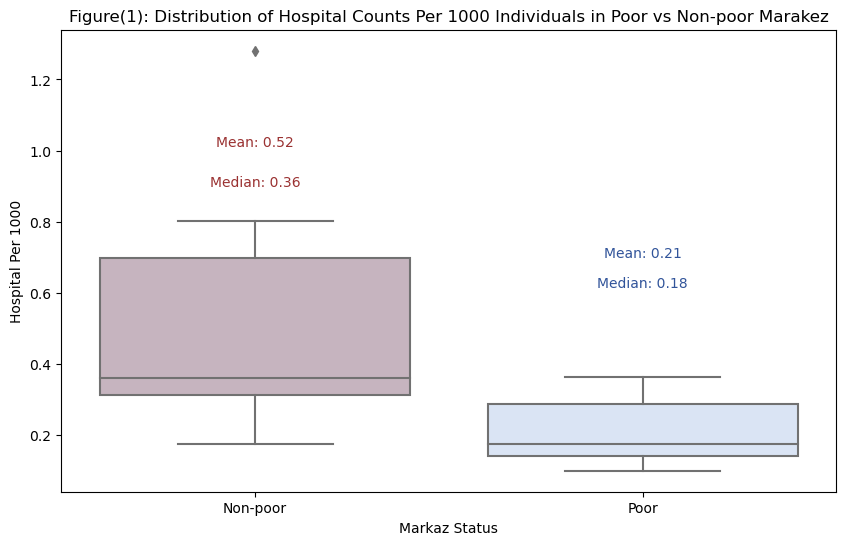

In [266]:
# Calculate the median and mean for each markaz type
median_poor = hospital_merged[hospital_merged['poor']]['hospitals_per_1000'].median()
median_rich = hospital_merged[~hospital_merged['poor']]['hospitals_per_1000'].median()
mean_poor = hospital_merged[hospital_merged['poor']]['hospitals_per_1000'].mean()
mean_rich = hospital_merged[~hospital_merged['poor']]['hospitals_per_1000'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

ax = sns.boxplot(x='poor', y='hospitals_per_1000', data=hospital_merged, palette=custom_palette)

# Add text annotations for median and mean
ax.text(x=1, y=median_poor + 0.45 , s=f'Median: {median_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=1, y=mean_poor + 0.5, s=f'Mean: {mean_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=0, y=median_rich + 0.55, s=f'Median: {median_rich:.2f}', color="#9A3131", ha='center', va='center')
ax.text(x=0, y=mean_rich + 0.5, s=f'Mean: {mean_rich:.2f}', color="#9A3131", ha='center', va='center')

# Customize the plot
ax.set_xlabel('Markaz Status')
ax.set_xticklabels(['Non-poor', 'Poor'])
ax.set_ylabel('Hospital Per 1000')
ax.set_title('Figure(1): Distribution of Hospital Counts Per 1000 Individuals in Poor vs Non-poor Marakez')

plt.show()

In [253]:
poor_counts = hospital_merged[hospital_merged['poor']]['hospitals_per_1000']
rich_counts = hospital_merged[~hospital_merged['poor']]['hospitals_per_1000']

# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-3.6568959300134685, pvalue=0.0011889391839042022, df=25.0)
MannwhitneyuResult(statistic=20.0, pvalue=0.0018596036689167194)
MannwhitneyuResult(statistic=20.0, pvalue=0.0009298018344583597)


## Mean testing of schools per 1000 individuals:

In [255]:
school_merged = pd.merge(df_school, population, on='Markaz', how='left')
school_merged['schools_per_1000'] = (school_merged['Count'] / school_merged['population']) * 1000

In [256]:
school_merged

,Markaz,Count,poor,population,source,schools_per_1000
0,مركز ابوالمطامير,858,True,603640.0,2023.0,1.421377
1,مركز المنيا,498,False,710808.0,2019.0,0.700611
2,مركز الأقصر,427,False,182158.0,2023.0,2.344119
3,مركز جرجا,371,True,376144.0,2023.0,0.986324
4,مركز دشنا,218,True,443079.0,2023.0,0.492012
5,مركز ببا,376,True,524012.0,2023.0,0.717541
6,مركز العدوة,357,True,295254.0,2019.0,1.209128
7,مركز ملوى,431,True,782483.0,2019.0,0.550811
8,مركز أسوان,250,False,73387.0,2023.0,3.406598
9,مركز الجيزة,1872,False,0.0,NaN,inf


In [257]:
school_merged = school_merged.drop([9,26])
school_merged

,Markaz,Count,poor,population,source,schools_per_1000
0,مركز ابوالمطامير,858,True,603640.0,2023.0,1.421377
1,مركز المنيا,498,False,710808.0,2019.0,0.700611
2,مركز الأقصر,427,False,182158.0,2023.0,2.344119
3,مركز جرجا,371,True,376144.0,2023.0,0.986324
4,مركز دشنا,218,True,443079.0,2023.0,0.492012
5,مركز ببا,376,True,524012.0,2023.0,0.717541
6,مركز العدوة,357,True,295254.0,2019.0,1.209128
7,مركز ملوى,431,True,782483.0,2019.0,0.550811
8,مركز أسوان,250,False,73387.0,2023.0,3.406598
10,مركز أبوتيج,323,True,258283.0,2023.0,1.250566


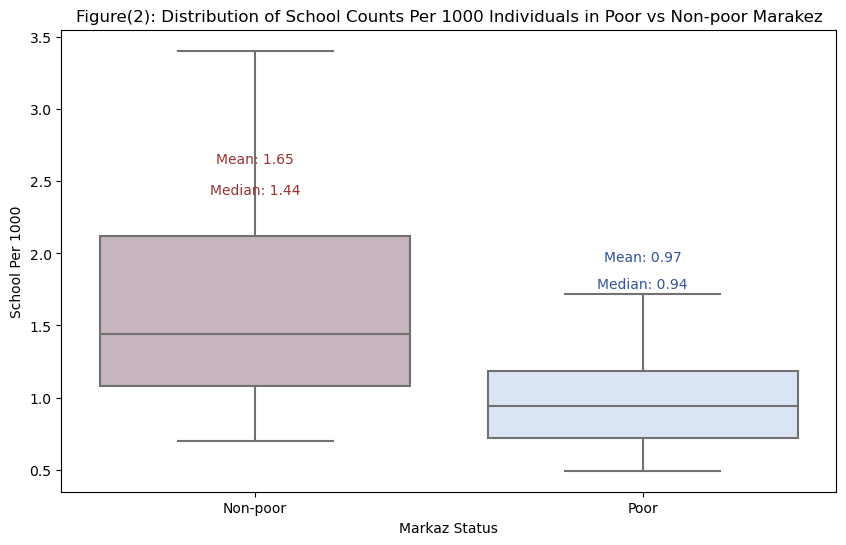

In [264]:
# Calculate the median and mean for each markaz type
median_poor = school_merged[school_merged['poor']]['schools_per_1000'].median()
median_rich = school_merged[~school_merged['poor']]['schools_per_1000'].median()
mean_poor = school_merged[school_merged['poor']]['schools_per_1000'].mean()
mean_rich = school_merged[~school_merged['poor']]['schools_per_1000'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

ax = sns.boxplot(x='poor', y='schools_per_1000', data=school_merged, palette=custom_palette)

# Add text annotations for median and mean
ax.text(x=1, y=median_poor + 0.85 , s=f'Median: {median_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=1, y=mean_poor + 1, s=f'Mean: {mean_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=0, y=median_rich + 1, s=f'Median: {median_rich:.2f}', color="#9A3131", ha='center', va='center')
ax.text(x=0, y=mean_rich + 1, s=f'Mean: {mean_rich:.2f}', color="#9A3131", ha='center', va='center')

# Customize the plot
ax.set_xlabel('Markaz Status')
ax.set_xticklabels(['Non-poor', 'Poor'])
ax.set_ylabel('School Per 1000')
ax.set_title('Figure(2): Distribution of School Counts Per 1000 Individuals in Poor vs Non-poor Marakez')

plt.show()

In [265]:
poor_counts = school_merged[school_merged['poor']]['schools_per_1000']
rich_counts = school_merged[~school_merged['poor']]['schools_per_1000']

# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.9978775111676037, pvalue=0.0060690466439652846, df=25.0)
MannwhitneyuResult(statistic=37.0, pvalue=0.02526030163201243)
MannwhitneyuResult(statistic=37.0, pvalue=0.012630150816006215)


## Mean testing of tamween per 1000 individuals

In [272]:
subsidized_merged = pd.merge(df_subsidized, population, on='Markaz', how='left')
subsidized_merged['tamween_per_1000'] = (subsidized_merged['Count'] / subsidized_merged['population']) * 1000

In [273]:
subsidized_merged

,Markaz,Count,poor,population,source,tamween_per_1000
0,مركز ابوالمطامير,26,True,603640.0,2023.0,0.043072
1,مركز المنيا,29,False,710808.0,2019.0,0.040799
2,مركز الأقصر,19,False,182158.0,2023.0,0.104305
3,مركز جرجا,26,True,376144.0,2023.0,0.069122
4,مركز دشنا,13,True,443079.0,2023.0,0.029340
5,مركز ببا,18,True,524012.0,2023.0,0.034350
6,مركز العدوة,12,True,295254.0,2019.0,0.040643
7,مركز ملوى,28,True,782483.0,2019.0,0.035784
8,مركز أسوان,12,False,73387.0,2023.0,0.163517
9,مركز الجيزة,55,False,0.0,NaN,inf


In [274]:
subsidized_merged = subsidized_merged.drop([9,26])

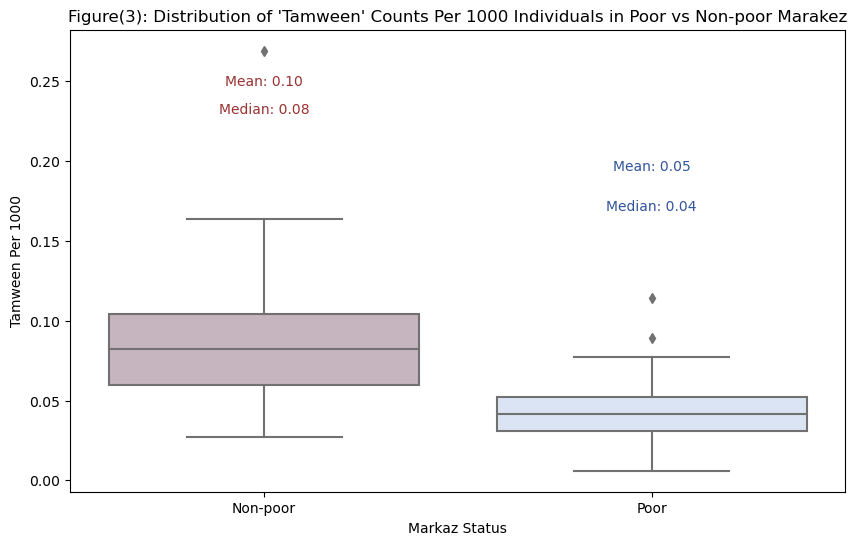

In [285]:
# Calculate the median and mean for each markaz type
median_poor = subsidized_merged[subsidized_merged['poor']]['tamween_per_1000'].median()
median_rich = subsidized_merged[~subsidized_merged['poor']]['tamween_per_1000'].median()
mean_poor = subsidized_merged[subsidized_merged['poor']]['tamween_per_1000'].mean()
mean_rich = subsidized_merged[~subsidized_merged['poor']]['tamween_per_1000'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

ax = sns.boxplot(x='poor', y='tamween_per_1000', data=subsidized_merged, palette=custom_palette)

# Add text annotations for median and mean
ax.text(x=1, y=median_poor + 0.13, s=f'Median: {median_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=1, y=mean_poor + 0.15, s=f'Mean: {mean_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=0, y=median_rich + 0.15, s=f'Median: {median_rich:.2f}', color="#9A3131", ha='center', va='center')
ax.text(x=0, y=mean_rich + 0.15, s=f'Mean: {mean_rich:.2f}', color="#9A3131", ha='center', va='center')

# Customize the plot
ax.set_xlabel('Markaz Status')
ax.set_xticklabels(['Non-poor', 'Poor'])
ax.set_ylabel('Tamween Per 1000')
ax.set_title('Figure(3): Distribution of \'Tamween\' Counts Per 1000 Individuals in Poor vs Non-poor Marakez')

plt.show()

In [284]:
poor_counts = subsidized_merged[subsidized_merged['poor']]['tamween_per_1000']
rich_counts = subsidized_merged[~subsidized_merged['poor']]['tamween_per_1000']

# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.7487600182550342, pvalue=0.010945710620496547, df=25.0)
MannwhitneyuResult(statistic=36.0, pvalue=0.022089055886676173)
MannwhitneyuResult(statistic=36.0, pvalue=0.011044527943338087)


## Mean Testing of Youth Centers per 1000 individuals:

In [286]:
youth_merged = pd.merge(df_youth_center, population, on='Markaz', how='left')
youth_merged['centers_per_1000'] = (youth_merged['Count'] / youth_merged['population']) * 1000

In [287]:
youth_merged = youth_merged.drop([9,26])

In [291]:
youth_merged

,Markaz,Count,poor,population,source,centers_per_1000
0,مركز ابوالمطامير,86,True,603640.0,2023.0,0.142469
1,مركز المنيا,38,False,710808.0,2019.0,0.053460
2,مركز الأقصر,56,False,182158.0,2023.0,0.307425
3,مركز جرجا,26,True,376144.0,2023.0,0.069122
4,مركز دشنا,26,True,443079.0,2023.0,0.058680
5,مركز ببا,53,True,524012.0,2023.0,0.101143
6,مركز العدوة,29,True,295254.0,2019.0,0.098221
7,مركز ملوى,45,True,782483.0,2019.0,0.057509
8,مركز أسوان,33,False,73387.0,2023.0,0.449671
10,مركز أبوتيج,19,True,258283.0,2023.0,0.073563


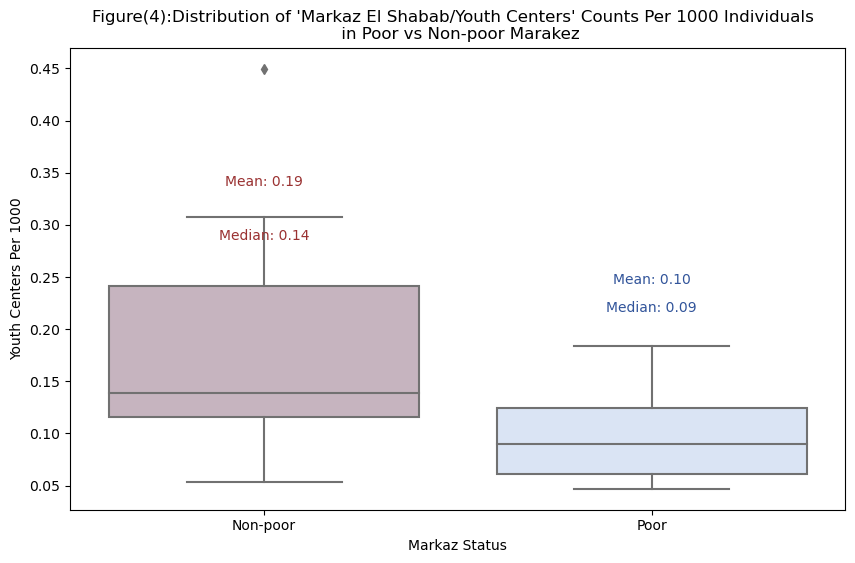

In [295]:
# Calculate the median and mean for each markaz type
median_poor = youth_merged[youth_merged['poor']]['centers_per_1000'].median()
median_rich = youth_merged[~youth_merged['poor']]['centers_per_1000'].median()
mean_poor = youth_merged[youth_merged['poor']]['centers_per_1000'].mean()
mean_rich = youth_merged[~youth_merged['poor']]['centers_per_1000'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

ax = sns.boxplot(x='poor', y='centers_per_1000', data=youth_merged, palette=custom_palette)

# Add text annotations for median and mean
ax.text(x=1, y=median_poor + 0.13, s=f'Median: {median_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=1, y=mean_poor + 0.15, s=f'Mean: {mean_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=0, y=median_rich + 0.15, s=f'Median: {median_rich:.2f}', color="#9A3131", ha='center', va='center')
ax.text(x=0, y=mean_rich + 0.15, s=f'Mean: {mean_rich:.2f}', color="#9A3131", ha='center', va='center')

# Customize the plot
ax.set_xlabel('Markaz Status')
ax.set_xticklabels(['Non-poor', 'Poor'])
ax.set_ylabel('Youth Centers Per 1000')
ax.set_title('Figure(4):Distribution of \'Markaz El Shabab/Youth Centers\' Counts Per 1000 Individuals  \n in Poor vs Non-poor Marakez')

plt.show()

In [294]:
poor_counts = youth_merged[youth_merged['poor']]['centers_per_1000']
rich_counts = youth_merged[~youth_merged['poor']]['centers_per_1000']

# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-2.953792290380613, pvalue=0.006745264444182692, df=25.0)
MannwhitneyuResult(statistic=35.0, pvalue=0.019269933664559934)
MannwhitneyuResult(statistic=35.0, pvalue=0.009634966832279967)


## Mean testing for manafez el be3 per 1000 individuals:

In [297]:
outlet_merged = pd.merge(df_retail_outlet, population, on='Markaz', how='left')
outlet_merged['outlets_per_1000'] = (outlet_merged['Count'] / outlet_merged['population']) * 1000

In [298]:
outlet_merged = outlet_merged.drop([9,26])

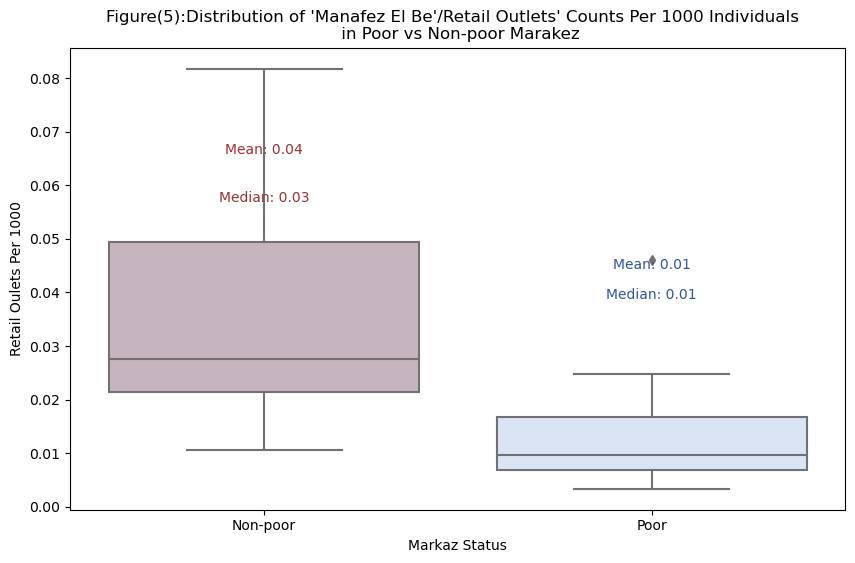

In [304]:
# Calculate the median and mean for each markaz type
median_poor = outlet_merged[outlet_merged['poor']]['outlets_per_1000'].median()
median_rich = outlet_merged[~outlet_merged['poor']]['outlets_per_1000'].median()
mean_poor = outlet_merged[outlet_merged['poor']]['outlets_per_1000'].mean()
mean_rich = outlet_merged[~outlet_merged['poor']]['outlets_per_1000'].mean()

plt.figure(figsize=(10, 6))
custom_palette = ["#C9B1BF", "#D6E3F8"] 

ax = sns.boxplot(x='poor', y='outlets_per_1000', data=outlet_merged, palette=custom_palette)

# Add text annotations for median and mean
ax.text(x=1, y=median_poor + 0.03, s=f'Median: {median_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=1, y=mean_poor + 0.032, s=f'Mean: {mean_poor:.2f}', color='#31549A', ha='center', va='center')
ax.text(x=0, y=median_rich + 0.03, s=f'Median: {median_rich:.2f}', color="#9A3131", ha='center', va='center')
ax.text(x=0, y=mean_rich + 0.03, s=f'Mean: {mean_rich:.2f}', color="#9A3131", ha='center', va='center')

# Customize the plot
ax.set_xlabel('Markaz Status')
ax.set_xticklabels(['Non-poor', 'Poor'])
ax.set_ylabel('Retail Oulets Per 1000')
ax.set_title('Figure(5):Distribution of \'Manafez El Be\'/Retail Outlets\' Counts Per 1000 Individuals  \n in Poor vs Non-poor Marakez')

plt.show()

In [305]:
poor_counts = outlet_merged[outlet_merged['poor']]['outlets_per_1000']
rich_counts = outlet_merged[~outlet_merged['poor']]['outlets_per_1000']

# ttest, assumes normality
print(stats.ttest_ind(poor_counts, rich_counts))
#print(stats.ttest_rel(df_hospital[df_hospital['poor']]['Count'], df_hospital[~df_hospital['poor']]['Count']))

# MannWhitney Test; no assumption of normality + assuming indepndent samples
print(stats.mannwhitneyu(poor_counts, rich_counts)) #Probably more reliable
print(stats.mannwhitneyu(poor_counts, rich_counts, alternative='less')) #Probably more reliable

TtestResult(statistic=-3.680195606442529, pvalue=0.001120804822300196, df=25.0)
MannwhitneyuResult(statistic=20.0, pvalue=0.0018596036689167194)
MannwhitneyuResult(statistic=20.0, pvalue=0.0009298018344583597)
